In [2]:
import numpy as np
import matplotlib.pyplot as plt

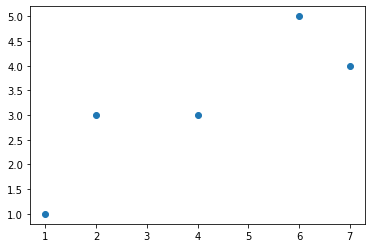

In [10]:
x = np.array([1, 2, 4, 6, 7])
y = np.array([1, 3, 3, 5, 4])
plt.scatter(x, y)

# 原点を通る直線による近似

## 最小二乗法

$$
    E = \sum_{i=1}^{n}(ax_i - y_i)^2
$$

E を$a$の関数だとみなして$a$で微分した関数が0になる条件を考える

$$
    \begin{align}
        \frac{\delta E}{\delta a}&= \sum 2x_i(ax_i - y_i) \\
            &= 2\{a \sum x_i^2 - \sum x_i y_i\} = 0
         \\
            a &= \frac{\Sigma x_i y_i}{\Sigma x_i^2} =
            \frac{\boldsymbol{x}^{T}\boldsymbol{y}}{||x||^2}
    \end{align} 
$$

In [8]:
def reg1dim1(x, y):
    a = np.dot(x, y) / (x**2).sum()
    return a

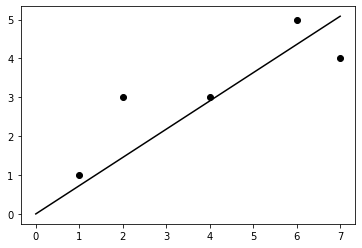

In [12]:
a = reg1dim1(x, y)
plt.scatter(x, y, color="k")
xmax = x.max()
plt.plot([0, xmax], [0, a*xmax], color="k")

## 一般の直線による近似
$$
    E = \sum_{i=1}^{n}(ax_i + b - y_i)^2
$$
Eをa, bの関数E(a, b)だと思って、$\nabla E = 0$とする。
$\frac{\delta E}{\delta a} = 0$,$\frac{\delta E}{\delta b} = 0$という連立方程式を解く。

$$
    \begin{align}
    &\sum_{i=0}^{n} x_i(ax_i + b - y_i) = 0 \\
    &\sum_{i=0}^{n} x_i(ax_i + b - y_i) = \sum_{i=0}^{n} ax_i + \sum_{i=0}^{n} b - \sum_{i=0}^{n}y_i = 0 \\
    &b = \frac{1}{n} \sum_{i=0}^{n}(y_i - ax_i) \\
    &a = \frac{\sum_{i=0}^{n}x_i y_i - \frac{1}{n}\sum_{i=0}^{n}x_i \sum_{i=0}^{n}y_i}{\sum_{i=0}^{n}x_i^2 - \frac{1}{n}(\sum_{i=0}^{n}x_i)^2}
    \end{align}
$$


In [13]:
def reg1dim2(x, y):
    n=len(x)
    a = ((np.dot(x,y) - y.sum() * x.sum() / n) /
          ((x**2).sum() - x.sum()**2 / n))
    b = (y.sum() - a * x.sum()) / n
    return a, b

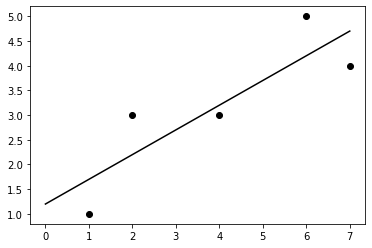

In [15]:
a, b = reg1dim2(x, y)
plt.scatter(x, y, color="k")
xmax = x.max()
plt.plot([0, xmax], [b, a*xmax + b], color="k")

## 特徴量ベクトルが多次元の場合

一般次元の場合の線形回帰モデル
$$
    y = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_d x_d + \epsilon
$$

$$
    y = \boldsymbol{w}^T \tilde{x}
$$

$$
    \hat{y} = \tilde{X} \boldsymbol{w}
$$
次の値を最小化する w を求める。
$$
    \begin{align}
     E(w) &= {|| y - \tilde{X} {w} ||}^2 \\
     &= (y - \tilde{X} \boldsymbol{w})^T (y - \tilde{X} {w}) \\
     &= y^T y - w^T \tilde{X}^T y - y^T \tilde{X} w + w^T \tilde{X}^T\tilde{X} w
    \end{align}
$$
この勾配を計算する
$$
    \nabla E(w) = -2 \tilde{X}^T y + 2 \tilde{X}^T \tilde{X} y
$$
これを = 0 とおくことで、最小化する w が求められる。

$$
    \begin{align}
    \nabla E(w) &= -2 \tilde{X}^T y + 2 \tilde{X}^T \tilde{X} y \\
    w &=  (\tilde{X}^T \tilde{X})^{-1} \tilde{X}^T y
    \end{align}
$$

In [19]:
from scipy import linalg
from mpl_toolkits.mplot3d import axes3d

In [17]:
class LinearRegression:
    def __init__(self):
        self.w_ = None
        
    def fit(self, X, t):
        Xtil = np.c_[np.ones(X.shape[0]), X]
        A = np.dot(Xtil.T, Xtil)
        b = np.dot(Xtil.T, t)
        self.w_ = linalg.solve(A, b)
        
    def predict(self, X):
        if X.ndim == 1:
            X = X.reshape(1, -1)
        Xtil = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)

In [25]:
n = 100
scale = 10
np.random.seed(0)
X=np.random.random((n, 2)) * scale
w0 = 1
w1 = 2
w2 = 3
y = w0+w1*X[:, 0]+w2*X[:, 1]+ np.random.randn(n)
model = LinearRegression()
model.fit(X, y)
print("係数:", model.w_)
print("(1, 1)に対する予測値：", model.predict(np.array([1, 1])))

係数: [1.11450326 1.95737004 3.00295751]
(1, 1)に対する予測値： [6.07483081]


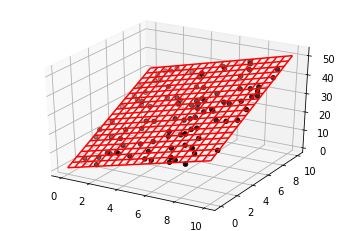

In [26]:
xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20), np.linspace(0, scale, 20))
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() + model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)
fig =plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color="k")
ax.plot_wireframe(xmesh, ymesh, zmesh, color="r")

In [37]:
import csv
Xy = []
with open("winequality-red.csv") as fp:
    for row in csv.reader(fp, delimiter=","):
            Xy.append(row)
Xy = np.array(Xy[1:], dtype=np.float64)

np.random.seed(0)
np.random.shuffle(Xy)
train_X=Xy[:-1000, :-1]
train_y=Xy[:-1000, -1]
test_X=Xy[-1000:, :-1]
test_y=Xy[-1000:, -1]

model=LinearRegression()
model.fit(train_X, train_y)
y = model.predict(test_X)

print("最初の５つの正解と予測値：")
for i in range(5):
    print("{:1.0f} {:5.3f}".format(test_y[i], y[i]))
print("RMSE:", np.sqrt(((test_y - y)**2).mean()))

最初の５つの正解と予測値：
7 6.012
6 5.734
5 5.285
8 6.352
5 5.414
RMSE: 0.6724248548470456


## リッジ回帰

線形回帰の目的関数にパラメータの大きさの項を足したもの
$$
    E(w) = {|| y - \tilde{X} {w} ||}^2 + \lambda {|| w ||}^2
$$

$\lambda {|| w ||}^2$の項(正則化項)が加わったことにより、点群を線形に近似しつつもできるだけ$w$の大きさ(L2ノルム)を小さくする力が働く。
$\lambda$はハイパーパラメータ。

線形回帰と同様に$w$についての勾配をとって$=0$とおく。
$$
    \begin{align}
    \nabla E(w) &= -2 \tilde{X}^T y + 2 \tilde{X}^T \tilde{X} y + 2\lambda w \\
    &= 2[(\tilde{X}^T \tilde{X} + \lambda {I})w - \tilde{X}^T y] = 0
    \end{align}
$$
より
$$
    w = (\tilde{X}^T \tilde{X} + \lambda {I})^{-1} \tilde{X}^T y
$$

In [42]:
class RidgeRegression:
    def __init__(self, lambda_=1.):
        self.lambda_ = lambda_
        self.w_ = None
        
    def fit(self, X, t):
        Xtil = np.c_[np.ones(X.shape[0]), X]
        I = np.eye(Xtil.shape[1])
        A = np.dot(Xtil.T, Xtil) + self.lambda_ *  I
        b = np.dot(Xtil.T, t)
        self.w_ = linalg.solve(A, b)

    def predict(self, X):
        Xtil = np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)

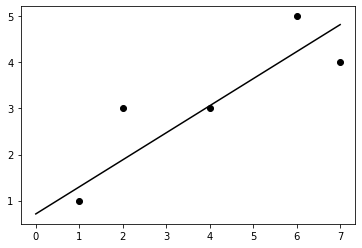

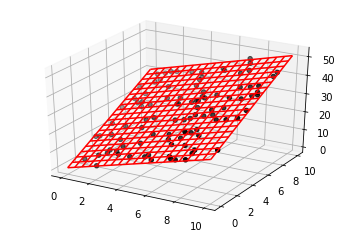

In [55]:
model = RidgeRegression(1.)
x = np.array([1, 2, 4, 6, 7])
y = np.array([1, 3, 3, 5, 4])
model.fit(x, y)
b, a = model.w_

plt.scatter(x, y, color = "k")
xmax = x.max()
plt.plot([0, xmax], [b,b+a*xmax], color="k")

n=100
y = w0+w1*X[:, 0]+w2*X[:, 1]+ np.random.randn(n)
model = RidgeRegression(1.)
model.fit(X, y)
xmesh, ymesh = np.meshgrid(np.linspace(0, scale, 20), np.linspace(0, scale, 20))
zmesh = (model.w_[0] + model.w_[1] * xmesh.ravel() + model.w_[2] * ymesh.ravel()).reshape(xmesh.shape)
fig =plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color="k")
ax.plot_wireframe(xmesh, ymesh, zmesh, color="r")

リッジ回帰ではサンプル数が少ない時に例外的なデータからの影響を受けにくい

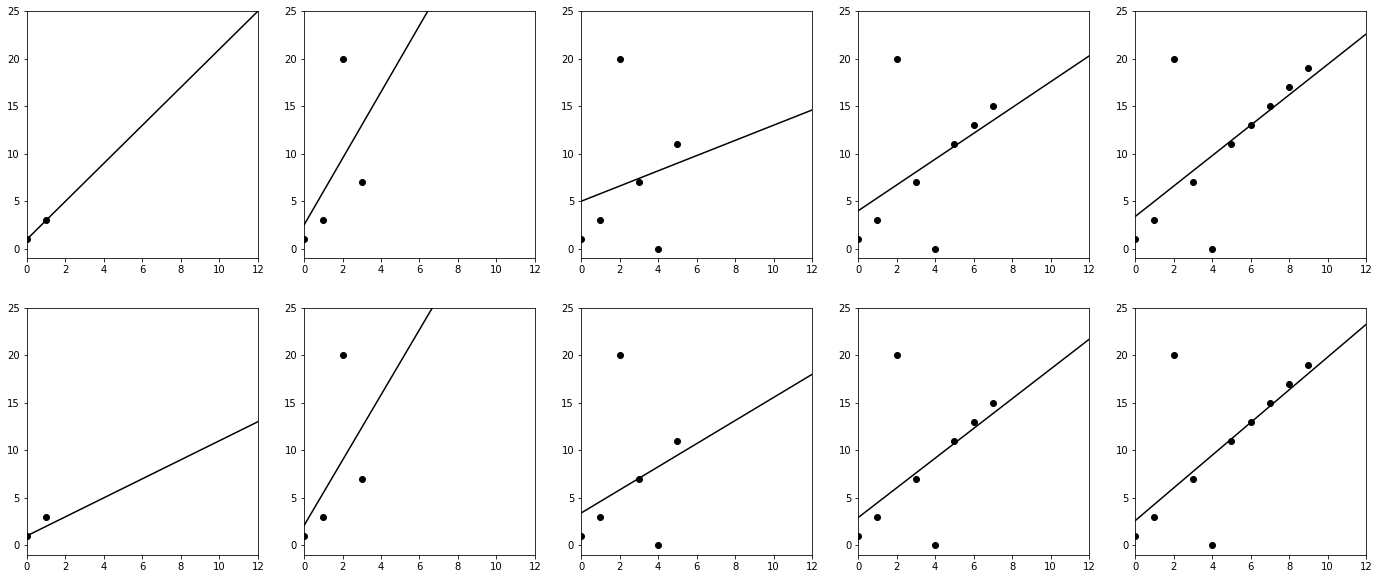

In [57]:
x = np.arange(12)
y = 1+2*x
y[2]=20
y[4] = 0
xmin =0
xmax = 12
ymin=-1
ymax=25
fig,axes=plt.subplots(nrows=2, ncols=5, figsize=(24, 10))
for i  in range(5):
    axes[0, i].set_xlim([xmin, xmax])
    axes[0, i].set_ylim([ymin, ymax])
    axes[1, i].set_xlim([xmin, xmax])
    axes[1, i].set_ylim([ymin, ymax])
    xx=x[:2+i*2]
    yy=y[:2+i *2]
    axes[0, i].scatter(xx,yy,color="k")
    axes[1, i].scatter(xx,yy,color="k")
    model=LinearRegression()
    model.fit(xx, yy)
    xs = [xmin, xmax]
    ys = [model.w_[0]+model.w_[1]*xmin, model.w_[0]+model.w_[1]*xmax]
    axes[0, i].plot(xs, ys, color="k")
    model = RidgeRegression()
    model.fit(xx, yy)
    xs = [xmin, xmax]
    ys = [model.w_[0]+model.w_[1]*xmin, model.w_[0]+model.w_[1]*xmax]
    axes[1, i].plot(xs, ys, color="k")

# 汎化と過学習
汎化性能：未知のデータをどれくらい予測できるか

多項式回帰アルゴリズム

$$
y = w_0 + w_1 x + w_2 x^2 + \cdots + w_d x^d + \epsilon
$$
w と x が与えられた時の予測値を
$$
\hat{y} = w_0 + w_1 x + w_2 x^2 + \cdots + w_d x^d 
$$
とする。
訓練データの特徴量 x とターゲット y に対して
$$
    \mathrm{min}_w || \hat{y}(x, w) - y || ^2
$$
これは
$$
\boldsymbol{M} = 
    \left(\begin{array}{ccccc}
        1 &x_1 &x_1^2 &\cdots &x_1^d \\
        1 &x_2 &x_2^2 &\cdots &x_2^d \\
        \vdots &\vdots &\ddots &\vdots & \\
        1 &x_n  &x_n^2 &\cdots &x_n^d
    \end{array}\right)
$$
を訓練データの特徴量行列として線形回帰を計算した場合と同じになる。

In [98]:
class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree
        
    def fit(self, x, y):
        x_pow = []
        xx = x.reshape(len(x), 1)
        for i in range(1, self.degree + 1):
            x_pow.append(xx**i)
        mat = np.concatenate(x_pow, axis=1)
        reg = LinearRegression()
        reg.fit(mat, y)
        self.w_ = reg.w_
        
    def predict(self, x):
        r = 0
        for i  in range(self.degree + 1):
            r+=x**i * self.w_[i]
        return r

In [78]:
def f(x):
    return 1+ 2 * x

/opt/anaconda3/envs/VariationalBayesianLearning/lib/python3.7/site-packages/ipykernel_launcher.py:9: LinAlgWarning: Ill-conditioned matrix (rcond=2.02584e-27): result may not be accurate.
  if __name__ == '__main__':


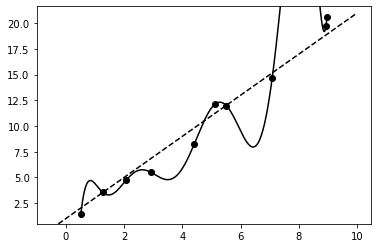

In [108]:
np.random.seed(3)
x = np.random.random(10)*10
y = f(x) + np.random.randn(10)
model = PolynomialRegression(10)
model.fit(x, y)

plt.scatter(x, y, color="k")
plt.ylim([y.min() - 1 , y.max() + 1])
xx = np.linspace(x.min() , x.max(), 300)
yy = np.array([model.predict(u) for u in xx])
plt.plot(xx, yy, color="k")

model = LinearRegression()
model.fit(x, y)
b, a = model.w_
x1 = x.min() - 1
x2 = x.max() + 1
plt.plot([x1, x2], [f(x1), f(x2)], color="k", linestyle="dashed")
plt.show()

# モデルの汎化性能

真の値$f(x)$ に対して、データ$D$を使って予測した値を$\hat{f}_D(x)$で表す。
データの集合$D$が与えられた時、二条誤差平均は
$$
    \underbrace{E_D[(f(x) -\hat{f}_D(x)^2]}_{予測誤差の平均} = 
    \underbrace{(f(x) - E_D[\hat{f}_D(x)])^2}_{バイアス} +
    \underbrace{E_D[(\hat{f}_D(x) - E_D[\hat{f}_D(x)])^2}_{バリアンス}
$$
という関係が成り立つ。

次の関数の値を線形回帰と多項式回帰を使って予測する。
$$
                    y=\frac{1}{1+x} \quad (0 \leq x \leq 5)
$$

In [130]:
def f(x):
    return 1/(1+x)

def sample(n):
    x = np.random.random(n)*5
    y = f(x)
    return x, y

In [112]:
import warnings

In [138]:
xx = np.arange(0, 5, 0.01)
np.random.seed(2)
y_poly_sum=np.zeros(len(xx))
y_poly_sum_sq=np.zeros(len(xx))
y_lin_sum=np.zeros(len(xx))
y_lin_sum_sq=np.zeros(len(xx))
n = 100000
y_true=f(xx)
warnings.filterwarnings("ignore")
for _ in range(n):
    x, y=sample(5)
    poly = PolynomialRegression(4)
    poly.fit(x,y)
    lin = LinearRegression()
    lin.fit(x,y)
    y_poly = poly.predict(xx)
    y_poly_sum+=y_poly
    y_poly_sum_sq+=(y_poly-y_true)**2
    y_lin = lin.predict(xx.reshape(-1, 1))
    y_lin_sum+=y_lin
    y_lin_sum_sq+=(y_lin - y_true)**2

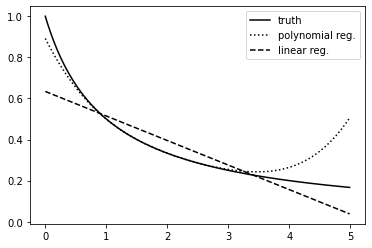

In [139]:
plt.plot(xx, f(xx), label="truth", color="k", linestyle="solid")
plt.plot(xx, y_poly_sum/n, label="polynomial reg.", color="k", linestyle="dotted")
plt.plot(xx, y_lin_sum/n, label="linear reg.", color="k", linestyle="dashed")
plt.legend()

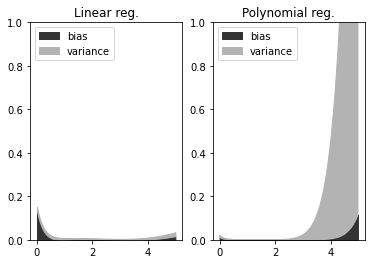

In [142]:
fig=plt.figure()
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.set_title("Linear reg.")
ax2.set_title("Polynomial reg.")
ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)
ax1.fill_between(xx, 0, (y_lin_sum / n - y_true)**2, color="0.2", label="bias")
ax1.fill_between(xx, (y_lin_sum/n - y_true)**2, y_lin_sum_sq/n, color="0.7",label="variance")
ax1.legend(loc="upper left")
ax2.fill_between(xx, 0, (y_poly_sum / n - y_true)**2, color="0.2", label="bias")
ax2.fill_between(xx, (y_poly_sum/n - y_true)**2, y_poly_sum_sq/n, color="0.7",label="variance")
ax2.legend(loc="upper left")

多項式回帰は$x>3$の範囲でバリアンスが激しく増加しており、未知のデータを予測する性能が高いとは言えない。
未知のデータを予測する性能を高める方法としてホールド・アウト検証(訓練データとテストデータに分割)も良いが、ハイパーパラメータを調整した結果、そのテストデータにのみよく予測できるが、一般のデータについてはあまりよく予測できないこともある。

# 交差検証
過学習を防ぐ方法として交差検証(クロスバリデーション）がある。データをk分割しk-1個を訓練データ、1個をテストデータとする。これをテストデータをk回変更して行い、複数回の評価の平均を全体の評価値とするもの。

# ラッソ回帰
リッジ回帰ではL2ノルムを正規化項として加えることでパラメータ値ができるだけ小さくなるだけ小さくなるようにした。
ラッソ回帰は正規化項としてL1ノルムを加えたもの。
すなわち次の関数を最小化するような$w$を求める。
$$
    \varphi = \frac{1}{2}||y-\bar{X}w||^2 + \lambda |w|_1
$$

L1ノルムは
$$
    |w|_1 = \sum_{i=0}^d |w_i|
$$
で定義される。

ラッソ回帰の解を求めるアルゴリズムとして座標降下法(coordinate descent)が知られる。

$x\in \mathbb{R}^d$の関数$\psi(x)$を最適化する時に、$\frac{\partial \psi}{\partial x_j} = 0\quad (j=1,\dots, d)$を同時に満たす$x_1, x_2, \dots, x_d$を同時に求めるのは難しいので適当な初期値から$\frac{\partial \psi}{\partial x_j} = 0$を満たす$x_j$で更新する方法。

$w_0$の計算が例外的なので$w_0$を求める。
$$
    \begin{align}
    \frac{\partial \varphi}{\partial w_0} &= - \sum_{i=0}^n(y_i -w_0-\sum_{j=1}^dx_{ij}w_j) \\
    &=  - \sum_{i=0}^n(y_i -\sum_{j=1}^dx_{ij}w_j) + nw_0=0
    \end{align}
$$
より
$$
    w_0=\frac{1}{n}\sum_{i=1}^d(y_i - \sum_{j=1}^dx_{ij}w_j)
$$
となる。
次に$w_k(k\neq0)$について偏微分をする。
$$
    \partial_{w_k}^{+} \varphi = - \sum_{i=1}^n(y_i -w_0 -\sum_{j=1}^dx_{ij}w_j)x_{ik} + \lambda \\
    \partial_{w_k}^{-} \varphi = - \sum_{i=1}^n(y_i -w_0 -\sum_{j=1}^dx_{ij}w_j)x_{ik} - \lambda
$$

$\partial_{w_k}^{+} \varphi = 0, \partial_{w_k}^{-} \varphi =0$と置いた時の解をそれぞれ
$$
    w_k^+ = \frac{ \sum_{i=1}^n(y_i -w_0 -\sum_{j\neq k}x_{ij}w_j)x_{ik} - \lambda}{\sum_{i=0}^nx_{ik}^2} \\
    w_k^- = \frac{ \sum_{i=1}^n(y_i -w_0 -\sum_{j\neq k}x_{ij}w_j)x_{ik} + \lambda}{\sum_{i=0}^nx_{ik}^2} \\
$$
とおく。
$w_k^+ > 0$ならば$w_k^+$に更新し、$w_k^- < 0$ならば$w_k^-$に更新する。
どちらも満たさないときは0のまま更新しない。

In [153]:
def soft_thresholding(x, y):
    return np.sign(x)*max(abs(x)-y, 0)

In [155]:
class Lasso:
    def __init__(self, lambda_, tol=0.0001, max_iter=1000):
        self.lambda_=lambda_
        self.tol=tol
        self.max_iter=max_iter
        self.w_=None
        
    def fit(self,X,t):
        n,d = X.shape
        self.w_=np.zeros(d+1)
        avgl1=0.
        for _ in range(self.max_iter):
            avgl1_prev=avgl1
            self._update(n,d,X,t)
            avgl1=np.abs(self.w_).sum()/self.w_.shape[0]
            if abs(avgl1 - avgl1_prev) <= self.tol:
                break
                
    def _update(self, n, d, X, t):
        self.w_[0]=(t-np.dot(X, self.w_[1:])).sum()/n
        w0vec=np.ones(n)*self.w_[0]
        for k in range(d):
            ww=self.w_[1:]
            ww[k]=0
            q = np.dot(t-w0vec - np.dot(X,ww), X[:, k])
            r = np.dot(X[:, k], X[:, k])
            self.w_[k+1]=soft_thresholding(q/r, self.lambda_)
            
    def predict(self, X):
        if X.ndim==1:
            X=X.reshape(X.shape[0], 1)
        Xtil=np.c_[np.ones(X.shape[0]), X]
        return np.dot(Xtil, self.w_)

In [147]:
import csv

In [150]:
Xy=[]
with open("winequality-red.csv") as fp:
    for row in csv.reader(fp, delimiter=","):
        Xy.append(row)
Xy = np.array(Xy[1:], dtype=np.float)

In [151]:
np.random.seed(0)
np.random.shuffle(Xy)
train_X=Xy[:-1000, :-1]
train_y=Xy[:-1000, -1]
test_X=Xy[-1000:, :-1]
test_y=Xy[-1000:, -1]

In [156]:
for lambda_ in [1., 0.1, 0.01]:
    model = Lasso(lambda_)
    model.fit(train_X, train_y)
    y = model.predict(test_X)
    print("--- lambda = {} ---".format(lambda_))
    print("coefficients:")
    print(model.w_)
    mse=((y-test_y)**2).mean()
    print("MSE: {:.3f}".format(mse))

--- lambda = 1.0 ---
coefficients:
[ 5.58430718  0.         -0.          0.          0.         -0.
  0.         -0.         -0.         -0.          0.          0.        ]
MSE: 0.691
--- lambda = 0.1 ---
coefficients:
[ 5.73493612  0.         -0.1407455   0.34369322 -0.         -2.00071813
  0.         -0.         -0.          0.          0.          0.        ]
MSE: 0.636
--- lambda = 0.01 ---
coefficients:
[ 5.71424724  0.         -1.01439751  0.00742223  0.         -3.34228417
  0.         -0.          0.          0.          1.04248618  0.        ]
MSE: 0.539
